## Welcome to my EuropeanCall Solver ! 
To use it, just set your input parameters and run all cells ! The price will be output

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("..")

from src.grid import TimeSpaceGrid
from src.payoffs import call_payoff_log
from src.operators import bs_log_operator_tridiag
from src.theta_scheme import solve_european_bs_log_theta

from math import sqrt, exp, log
from scipy.stats import norm

In [2]:
def bs_call_price(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return S * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)

# Input parameters

In [9]:
# Model params
S0    = 100.0
K     = 100.0
r     = 0.05
sigma = 0.2
T     = 1.0

# Domain in log-space : S ∈ [S_min, S_max]
S_min = 0.01 * K
S_max = 4.0 * K
L     = np.log(S_max)          # x ∈ [-L, L]

# Grid params
N = 200        # interior points
M = 500        # time steps
theta = 0.5    # Crank–Nicolson

grid = TimeSpaceGrid(T=T, L=L, N=N, M=M)

print(f"k = {grid.k:.4e}, h = {grid.h:.4e}")


k = 2.0000e-03, h = 5.9617e-02


In [ ]:
# Terminal payoff on the spatial grid
u_T = call_payoff_log(grid.x, K)

# Spatial operator coefficients for BS in log-space
a, b, c = bs_log_operator_tridiag(grid, r=r, sigma=sigma)

# Solve PDE backwards with θ-scheme
u = solve_european_bs_log_theta(
    grid=grid,
    a=a,
    b=b,
    c=c,
    u_T=u_T,
    theta=theta,
)

# Output

PDE price = 10.516971896747394
BS price  = 10.450583572185565
error     = 0.06638832456182975


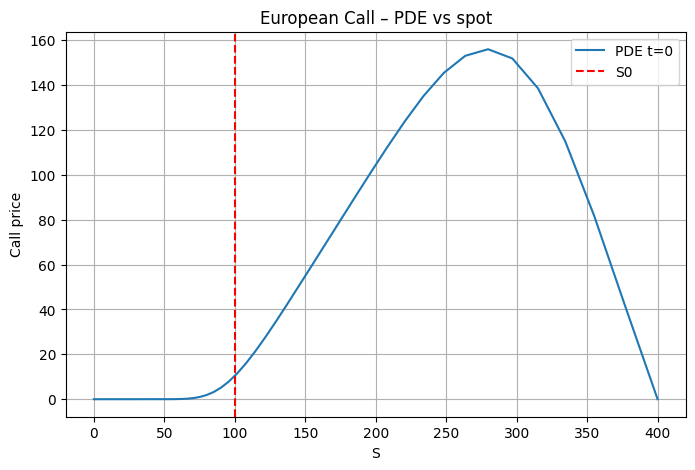

In [14]:
x0 = np.log(S0)

price_pde = np.interp(x0, grid.x, u[0, :])
price_bs = bs_call_price(S0, K, r, sigma, T)

print("PDE price =", price_pde)
print("BS price  =", price_bs)
print("error     =", abs(price_pde - price_bs))

plt.figure(figsize=(8, 5))
plt.plot(np.exp(grid.x), u[0, :], label="PDE t=0")
plt.axvline(S0, color="r", linestyle="--", label="S0")
plt.xlabel("S")
plt.ylabel("Call price")
plt.title("European Call – PDE vs spot")
plt.grid(True)
plt.legend()
plt.show()

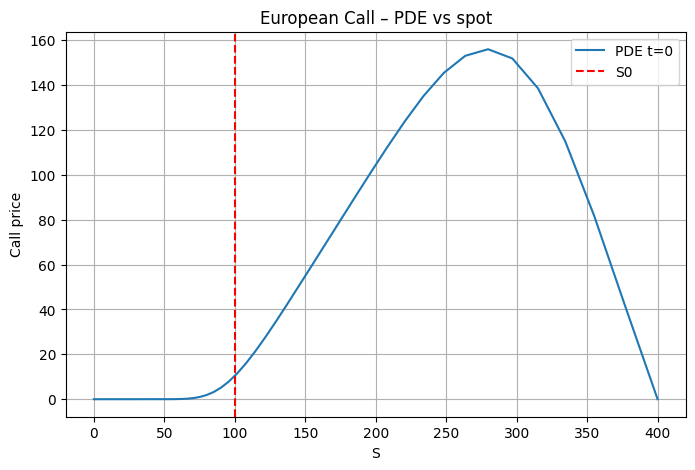